In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
import numpy as np
import math
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
drug_df = pd.read_csv("drug200.csv")
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
# drug type is the target feature
x = drug_df[["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]]
y = drug_df[["Drug"]]

<h2> Preprocessing the data </h2>

In [4]:
x["Sex"] = x["Sex"].map({"F":0, "M":1})
x["BP"] = x["BP"].map({"LOW":0, "NORMAL":1, "HIGH":2})
x["Cholesterol"] = x["Cholesterol"].map({"LOW":0, "NORMAL":1, "HIGH":2})

In [5]:
x_np = x.to_numpy()
y_np = y.to_numpy()
x_scaled = preprocessing.scale(x_np)
print(x_scaled.shape)

(200, 5)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_np, test_size=0.25, train_size=0.75, random_state=42)
y_train = y_train.reshape((y_train.shape[0]), 1)
print(x_train.shape)
print(y_train.shape)

(150, 5)
(150, 1)


In [7]:
learning_rates=[0.001, 0.01, 0.1, 1, 10]
train_accuracies = []
test_accuracies = []
for alpha in learning_rates:
    clf = MLPClassifier(random_state=1, max_iter=1000, learning_rate_init=alpha)
    clf.fit(x_train, y_train.ravel())
    predictions = clf.predict(x_test)
    train_accuracies.append(clf.score(x_train, y_train))
    test_accuracies.append(clf.score(x_test, y_test))
    print("Learning Rate:", alpha, "; Train Accuracy: ", clf.score(x_train, y_train), "; Test Accuracy: ", clf.score(x_test, y_test))
    print(confusion_matrix(y_test,predictions))
    print(classification_report(y_test,predictions))
    print("\n\n\n")

Learning Rate: 0.001 ; Train Accuracy:  1.0 ; Test Accuracy:  0.98
[[19  0  1  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 15]]
              precision    recall  f1-score   support

       DrugY       1.00      0.95      0.97        20
       drugA       1.00      1.00      1.00         6
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        15

    accuracy                           0.98        50
   macro avg       0.95      0.99      0.97        50
weighted avg       0.98      0.98      0.98        50





Learning Rate: 0.01 ; Train Accuracy:  1.0 ; Test Accuracy:  0.98
[[19  0  1  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 15]]
              precision    recall  f1-score   support

       DrugY       1.00      0.95      0.97        20
       drugA       1.00      1.00      1.00         6
       drugB       0.75      

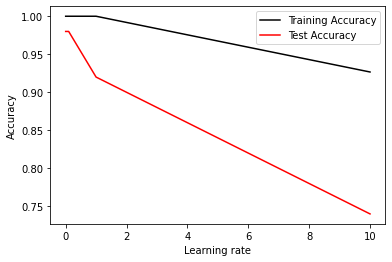

In [8]:
plt.plot(learning_rates, train_accuracies, c="black")
plt.plot(learning_rates, test_accuracies, c="red")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')